# Gráficos básicos: Conceptos principales

El objetivo de esta sección es enseñarte los conceptos principales para crear un gráfico básico de Altair; es decir:

- **Datos**, **Marcadores**, y **Codificaciones**: las tres piezas principales de un gráfico de Altair.

- **Tipos de codificaciones**: ``Q`` (cuantitativo), ``N`` (nominal), ``O`` (ordinal), ``T`` (temporal), las cuales impulsan la representación visual de cada codificación.

- **Bineado y Agregación**:  lo que te permite controlar aspectos de la representación de los datos dentro de Altair.

Con un buen entendimiento de estas piezas principales, vas a poder manejarte bien en la realización de una gran variedad de gráficos con Altair.

Comencemos importando Altair, y (si fuese necesario) habilitando el renderizador apropiado:

In [1]:
import altair as alt

# Los gráficos de Altair renderizan por defecto en JupyterLab y nteract

# Descomentar/ejecutar esta linea para activar Altair en un notebook clásico (no en JupyterLab)
# alt.renderers.enable('notebook')

# Descomentar/ejecutar esta linea para activar Altair en Colab
# alt.renderers.enable('colab')

## Un gráfico básico de Altair

Los elementos esenciales de un gráfico de Altair son los **datos**(_data_), los **marcadores**(_mark_), y las **codificaciones**(_encoding_).

El formato por el cual los especificamos se veria algo así:

```python
alt.Chart(data).mark_point().encode(
    encoding_1='column_1',
    encoding_2='column_2',
    # etc.
)
```
Veamos de a una, cada una de estas piezas.

### Los datos

Los datos en Altair estan construidos en base al [Pandas Dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).
Para esta sección, vamos a utilizar el conjunto de datos de autos que utilizamos antes, el cual podemos cargar usando el paquete [vega_datasets](https://github.com/altair-viz/vega_datasets):

In [3]:
from vega_datasets import data
cars = data.cars()

cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


Altair espera que los datos estén en un [formato ordenado](http://vita.had.co.nz/papers/tidy-data.html)(*tidy format*); en otras palabras:

- cada **fila** es una observación
- cada **columna** es una variable

Ver la [Documentación de Altair](https://altair-viz.github.io/user_guide/data.html) para más información.

### El objeto *Chart* ( Gráfico )

Con los datos definidos, uno puede instanciar un objeto fundamental de Altair, el ``Chart``:

In [9]:
chart = alt.Chart(cars)

Fundamentalmente, un ``Chart`` es un objeto que sabe cómo producir un diccionario JSON que representa los datos y las codificaciones de la visualización. El cual puede enviarse al *notebook* y ser renderizado por, la librería JavaScript, Vega-Lite.

Veamos como se ve esta representación en JSON, usando solo la primera fila de los datos:

In [15]:
cars1 = cars.iloc[:1]
alt.Chart(cars1)

SchemaValidationError: Invalid specification

        altair.vegalite.v2.api.Chart, validating 'required'

        'mark' is a required property
        

Chart({
  data:    Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
  0          12.0          8         307.0       130.0              18.0   
  
                          Name Origin  Weight_in_lbs       Year  
  0  chevrolet chevelle malibu    USA           3504 1970-01-01  
})

Hasta este punto el gráfico solo incluye una representación en formato JSON del *dataframe*, junto con metadata que se incluye en cada gráfico.

### El marcador ( *Mark* )

A continuación vamos a decidir que tipo de marcador vamos a utilizar para representar nuestros datos.
Por ejemplo, podemos elegir el marcador de punto ``point`` para representar cada dato como un punto en el gráfico:

In [16]:
alt.Chart(cars).mark_point()

El resultado es una visualización de un punto por cada fila en los datos, pero no es nada particularmente interesante: todos los puntos están apilados uno encima de otro!

Es bastante útil volver a examinar la representación en formato JSON:

In [18]:
alt.Chart(cars1).mark_point().to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'name': 'data-36a712fbaefa4d20aa0b32e160cfd83a'},
 'mark': 'point',
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.6.0.json',
 'datasets': {'data-36a712fbaefa4d20aa0b32e160cfd83a': [{'Acceleration': 12.0,
    'Cylinders': 8,
    'Displacement': 307.0,
    'Horsepower': 130.0,
    'Miles_per_Gallon': 18.0,
    'Name': 'chevrolet chevelle malibu',
    'Origin': 'USA',
    'Weight_in_lbs': 3504,
    'Year': '1970-01-01T00:00:00'}]}}

Noten que ahora además de los datos, la especificación incluye información sobre el tipo de marcador.

Existe una variedad de marcadores disponibles que se pueden utilizar; algunos de los más comúnmente utilizados son:

* ``mark_point()``
* ``mark_circle()``
* ``mark_square()``
* ``mark_line()``
* ``mark_area()``
* ``mark_bar()``
* ``mark_tick()``

Pueden conseguir la lista completa de los métodos ``mark_*`` utilizando el *tab-completion* de Jupyter: en cualquier celda escriban:

    alt.Chart.mark_
    
seguido, aprieten la tecla tab para ver las opciones disponibles.

In [19]:
# prueben el tab-completion aquí


### Codificaciones (*Encodings*)

El siguiente paso es añadir al gráfico **canales de codificación visual** (*visual encoding channels* o *encodings* para abreviar). Un canal de codificación específica como una dada columna de los datos debe ser mapeada a las propiedades visuales del gráfico.
Varias de las codificaciones visuales más utilizadas son:

* ``x``: valor en el eje x
* ``y``: valor en el eje y
* ``color``: color del marcador
* ``opacity``: transparencia u opacidad del marcador
* ``shape``: forma del marcador
* ``size``: tamaño del marcador
* ``row``: fila dentro de una grilla de gráficos
* ``column``: columna dentro de una grilla de gráficos

Para ver una lista completa de estas codificaciones, ver la seccion de [Encodings](https://altair-viz.github.io/user_guide/encoding.html) dentro de la documentación.
Las codificaciones visuales se pueden crear con el método ``encode()`` del objeto ``Chart``. Por ejemplo, podemos empezar mapeando el eje ``y`` a la columna ``Origin``:

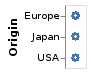

In [20]:
alt.Chart(cars).mark_point().encode(
    y='Origin'
)

El resultado es una visualización unidimensional representando los valores que toma ``Origin``, con los puntos en cada categoría todos encimados.
Al igual que antes, podemos ver la representación de la visualización en formato JSON:

In [21]:
alt.Chart(cars1).mark_point().encode(
    x='Origin'
).to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'name': 'data-36a712fbaefa4d20aa0b32e160cfd83a'},
 'mark': 'point',
 'encoding': {'x': {'type': 'nominal', 'field': 'Origin'}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.6.0.json',
 'datasets': {'data-36a712fbaefa4d20aa0b32e160cfd83a': [{'Acceleration': 12.0,
    'Cylinders': 8,
    'Displacement': 307.0,
    'Horsepower': 130.0,
    'Miles_per_Gallon': 18.0,
    'Name': 'chevrolet chevelle malibu',
    'Origin': 'USA',
    'Weight_in_lbs': 3504,
    'Year': '1970-01-01T00:00:00'}]}}

El resultado es el mismo de arriba agregando el atributo de ``'encoding'``, la cual especifica el canal de visualización (``x``), el nombre del campo  (``Origin``) y el tipo de la variable (``nominal``).

En breve vamos a discutir sobre los tipos de datos.

La visualización se puede hacer más interesante añadiendo otro canal a la codificación: agreguemos ``Miles_per_Gallon`` como la posición en ``x``:

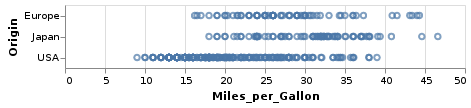

In [22]:
alt.Chart(cars).mark_point().encode(
    y='Origin',
    x='Miles_per_Gallon'
)

Puedes agregar tantas codificaciones como quieras, con cada codificación asociada a una columna de los datos.
Por ejemplo, aquí vamos a usar *Origin* para asignarle un color a los puntos, y graficamos *Miles_per_gallon* vs *Year*:

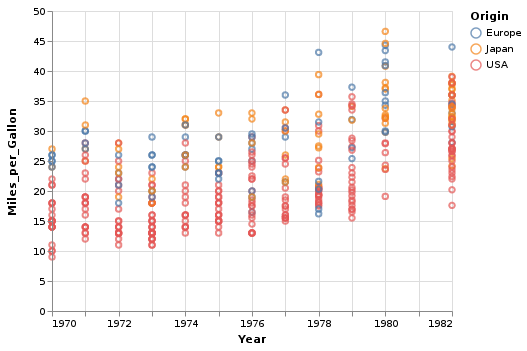

In [23]:
alt.Chart(cars).mark_point().encode(
    color='Origin',
    y='Miles_per_Gallon',
    x='Year'
)

### Ejercicio: Explorando los datos

Ahora que sabes lo básico (*Data, encodings, marks*) tomate un tiempo e intenta hacer un par de gráficos!

En particular, les sugiero que intenten varias combinaciones de los siguientes:

- Marcadores: ``mark_point()``, ``mark_line()``, ``mark_bar()``, ``mark_text()``, ``mark_rect()``...
- Columnas de datos: ```'Acceleration'``, ``'Cylinders'``, ``'Displacement'``, ``'Horsepower'``, ``'Miles_per_Gallon'``, ``'Name'``, ``'Origin'``, ``'Weight_in_lbs'``, ``'Year'``
- Codificaciones: ``x``, ``y``, ``color``, ``shape``, ``row``, ``column``, ``opacity``, ``text``, ``tooltip``...

Trabaja con alguien usando varias combinaciones de estas opciones, y observen qué pueden aprender sobre los datos! En particular, piensen sobre lo siguiente:

- ¿Qué tipo de codificaciones sirven para los valores continuos y cualitativos?
- ¿Qué tipo de codificaciones sirven para valores discretos y categóricos (i.e. nominales)?

Dentro de aproximadamente 10 minutos, vamos a pedir a un par de voluntaries que compartan sus combinaciones de marcadores, columnas y codificaciones.

---

## Tipos de codificaciones 

Una de las ideas centrales de Altair es que la librería **va a elegir buenos valores por defecto para tus tipos de datos**.

Los tipos de datos básicos que Altair soporta son los siguientes:

| Tipo de dato | Código | Descripción |
|--------------|--------|-------------|
| cuantitativo | Q | Cantidad numérica ( número *real* ) |
| nominal | N | Nombre / Categórico no ordenado |
| ordinal | O | Categórico ordenado |
| temporal| T | Fecha / Tiempo |


Cuando defines los datos como un *dataframe de pandas*, Altair **determina automáticamente** estos tipos de datos.
Cuando defines los datos como una URL, tienes que **especificar manualmente** el tipo de dato de cada columna.

Veamos un gráfico sencillo que tiene tres de las columnas de los datos de los autos:

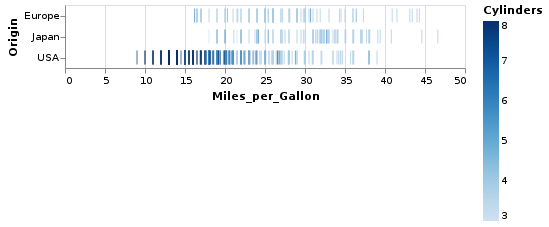

In [25]:
alt.Chart(cars).mark_tick().encode(
    x='Miles_per_Gallon',
    y='Origin',
    color='Cylinders'
)

Preguntas:

- ¿Qué tipo de dato va mejor con ``Miles_per_Gallon``?
- ¿Qué tipo de dato va mejor con ``Origin``?
- ¿Qué tipo de dato va mejor con ``Cylinders``?

Agreguemos el tipo de datos a las especificaciones, usando los codigos de una letra listados arriba (por ejemplo, cambien ``"Miles_per_Gallon"`` a ``"Miles_per_Gallon:Q"`` para especificar explicitamente que es de tipo cuantitativo):

Como ahora usas Altair, es práctico ejercitar el hábito de siempre especificar explícitamente los tipos de datos, porque es *mandatorio* cuando se trabaja con datos cargados de un archivo o de una URL.

### Ejercicio: Agregar los tipos de manera explícita

A continuación hay un par de gráficos sencillos armados con los datos de los autos. Para cada uno, traten de agregar explícitamente los tipos a las codificaciones ( i.e. cambiar ``"Horsepower"`` a ``"Horsepower:Q"`` así el gráfico no se modifica.

¿Hay gráficos que se pueden mejorar cambiando el tipo de dato?

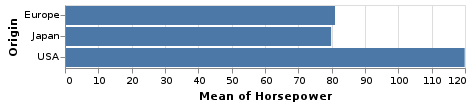

In [26]:
alt.Chart(cars).mark_bar().encode(
    y='Origin',
    x='mean(Horsepower)'
)

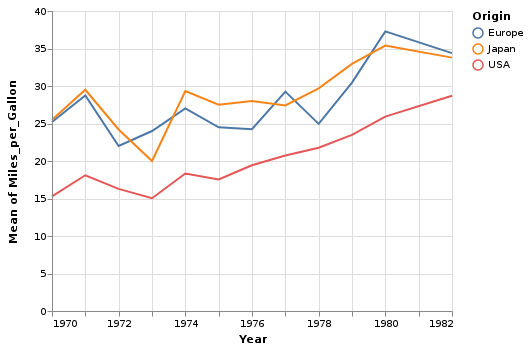

In [27]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)',
    color='Origin'
)

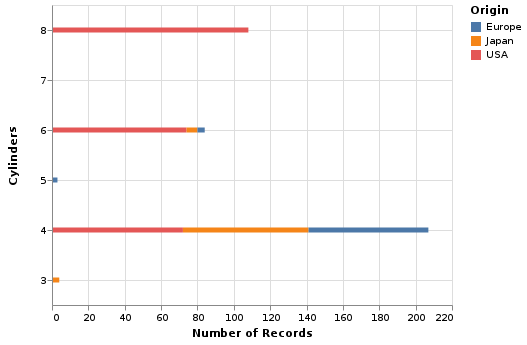

In [28]:
alt.Chart(cars).mark_bar().encode(
    y='Cylinders',
    x='count()',
    color='Origin'
)

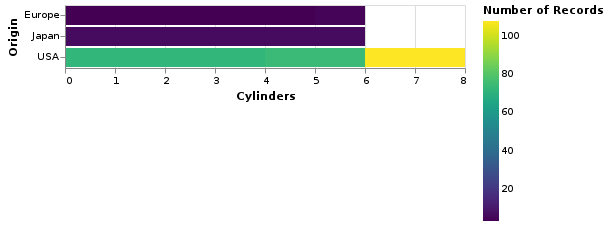

In [29]:
alt.Chart(cars).mark_rect().encode(
    x='Cylinders',
    y='Origin',
    color='count()'
)